# Basic regression with Tensorflow
Learning how tensorflow works starting with simple linear regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

## Settings

In [2]:
learning_rate = .001
epochs = 400
data_set_size = 50
batch_size = 10
test_set_size = 20
print_every = 50

In [3]:
num_batches = data_set_size/batch_size
assert data_set_size%batch_size == 0, "The data_set_size must be evely divisible by the batch_size"

## Generate some data

In [4]:
def getY(x):
    return .125*x+np.random.randn(x.shape[0])*.125 +2

In [5]:
# simple linear relationship

train_x = np.ones((data_set_size,2))
train_x[:,1:] = np.linspace(-10,10,data_set_size)[:,np.newaxis]
train_y = getY(train_x[:,1])


test_x = np.ones((test_set_size,2))
test_x[:,1:] = np.linspace(-10,10,test_set_size)[:,np.newaxis]
test_y = getY(test_x[:,1])


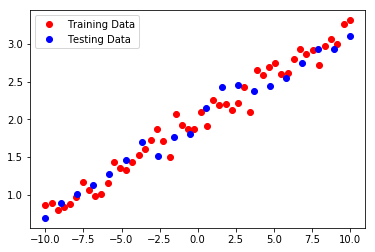

In [6]:
plt.figure()
plt.plot(train_x[:,1],train_y,'ro',label='Training Data')
plt.plot(test_x[:,1],test_y,'bo',label='Testing Data')
plt.legend()


Make the tensorflow placeholders

In [7]:
X = tf.placeholder(tf.float32, shape = [batch_size,2])
Y = tf.placeholder(tf.float32, shape = [batch_size])

In [8]:
# setup model weights
W = tf.Variable(np.random.randn(2,1).astype(np.float32),name='weight')

In [9]:
# make the model
yhat = tf.matmul(X,W)

y_error = tf.subtract(yhat,Y)
cost = tf.reduce_sum(tf.divide(tf.pow(y_error,2),2*batch_size))

In [10]:
# set up the optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [11]:
init = tf.global_variables_initializer()

In [12]:
# utility function to compute a batch
# can compute over the optimizer or cost and return the cost if needed
def computeBatch(solveFor):
    x = 0
    for batch in xrange(num_batches):
        batch_start = batch*batch_size
        batch_end = batch_start + batch_size
        temp = sess.run(solveFor, feed_dict={X:train_x[batch_start:batch_end,:],Y:train_y[batch_start:batch_end]})
        if type(temp) is not type(None):
            x += temp
    return x
        

epoch: 0	 cost: 2.24e+02
epoch: 50	 cost: 1.99e+00
epoch: 100	 cost: 1.44e+00
epoch: 150	 cost: 1.44e+00
epoch: 200	 cost: 1.44e+00
epoch: 250	 cost: 1.44e+00
epoch: 300	 cost: 1.44e+00
epoch: 350	 cost: 1.44e+00
epoch: 400	 cost: 1.44e+00


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log


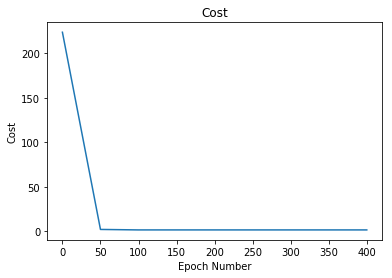

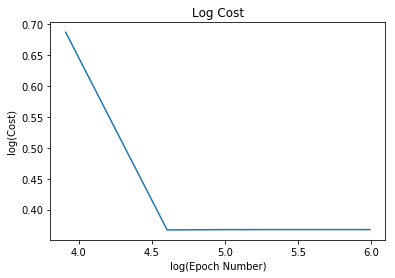

In [13]:
costs = np.array([])

with tf.Session() as sess:
    sess.run(init)

    for epoch in xrange(epochs+1):
        computeBatch(optimizer)
        
        if epoch % print_every == 0:
            c = computeBatch(cost)
            costs = np.append(costs,c)
            print('epoch: {}\t cost: {:.2e}'.format(epoch, computeBatch(cost)))
            
    W_finished = sess.run(W)
            
plt.figure()
plt.plot(np.linspace(0,epochs,epochs/print_every+1),costs)
plt.title('Cost')
plt.xlabel('Epoch Number')
plt.ylabel('Cost')

plt.figure()
plt.plot(np.log(np.linspace(0,epochs,epochs/print_every+1)),np.log(costs))
plt.title('Log Cost')
plt.xlabel('log(Epoch Number)')
plt.ylabel('log(Cost)')

        

In [14]:
# Compute the resulting line for the test set
pred_y = np.dot(test_x,W_finished)

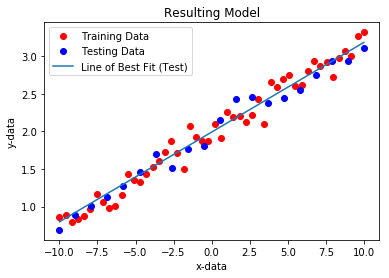

In [15]:
plt.plot(train_x[:,1],train_y,'ro',label='Training Data')
plt.plot(test_x[:,1],test_y,'bo',label='Testing Data')
plt.plot(test_x[:,1],pred_y,label='Line of Best Fit (Test)')
plt.title('Resulting Model')
plt.xlabel('x-data')
plt.ylabel('y-data')
plt.legend()

In [16]:
print W_finished

[[ 1.98944914]
 [ 0.11914054]]
